## Module 01: Supervised Learning

### Lesson 09: Training and Tuning

> Learn the main types of errors that can occur during training, and several methods to deal with them and optimize your machine learning models.

#### 01. Types of Errors

**Tradeoff**

* UnderFitting(High bias)
    * Does not do well in the training set
    * Error due to bias
* OverFitting(High variance)
    * Does well in the training set, but it tends to memorize it instead of learning the characteristics of it.
    * Error due to variance

#### 02. Model Complexity Graph

* X: model complex
* Y: Error

#### 03. Cross Validation

* data set split 3 parts: training data, cross validation, testing data

#### 04. K-Fold Cross Validatio

In [1]:
from sklearn.model_selection import KFold

kf = KFold(12, shuffle=True)
for train_indices, test_indices in kf.split(range(12)):
    print(train_indices, test_indices)

[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  3  4  5  6  7  8  9 10 11] [2]
[ 0  1  2  4  5  6  7  8  9 10 11] [3]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 1  2  3  4  5  6  7  8  9 10 11] [0]
[ 0  2  3  4  5  6  7  8  9 10 11] [1]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]


#### 05. Learning Curves

So in summary, here we have our three models the high bias, the good one and the high variance.

* The high bias or underfitting model, the curves get close to each other and converts to a high point. 
* In the good model the curves again go close to each other and converge to a low point, 
* The high-variance or over fitting model, the curves did not get close to each other.

#### 06. Detecting Overfitting and Underfitting with Learning Curves

**Learning Curves**

We'll be using the function called [learning_curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html):

```
train_size, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
```

* `estimator`, is the actual classifier we're using for the data, e.g., LogisticRegression() or GradientBoostingClassifier().
* `X and y` is our data, split into features and labels.
* `train_sizes` are the sizes of the chunks of data used to draw each point in the curve.
* `train_scores` are the training scores for the algorithm trained on each chunk of data.
* `test_scores` are the testing scores for the algorithm trained on each chunk of data.

Two very important observations:

* The training and testing scores come in as a list of 3 values, and this is because the function uses 3-Fold Cross-Validation.
* **Very important**: As you can see, we defined our curves with `Training and Testing Error`, and this function defines them with Training and Testing Score. These are opposite, so the higher the error, the lower the score. Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above.

**Drawing the learning curves**

In here, we'll be comparing three models:

* A Logistic Regression model.
* A Decision Tree model.
* A Support Vector Machine model with an rbf kernel, and a gamma parameter of 1000 (we'll learn what these mean later).

In [2]:
# Import, read, and split data
import pandas as pd
import numpy as np

data = pd.read_csv('../../data/lc_data.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
log_estimator = LogisticRegression()

### Decision Tree
gb_estimator = GradientBoostingClassifier()

### Support Vector Machine
svc_estimator = SVC(kernel='rbf', gamma=1000)

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, y):
    permutation = np.random.permutation(y.shape[0])
    X2 = X[permutation, :]
    y2 = y[permutation]
    return X2, y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_size, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, num=num_trainings))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    plt.plot(train_scores_mean, 'o-', color='g',
             label="Traing Score")
    plt.plot(test_scores_mean, 'o-', color='y',
             label="Cross-validation Score")
    
    plt.legend(loc="best")
    plt.show()

/Users/webstrum/anaconda3/envs/dsna/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 73 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


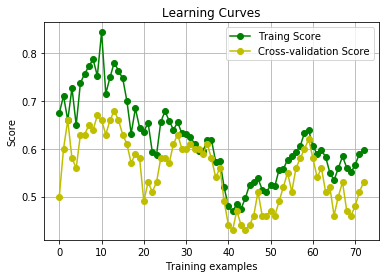

In [3]:
draw_learning_curves(X, y, log_estimator, y.shape[0])

/Users/webstrum/anaconda3/envs/dsna/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 73 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


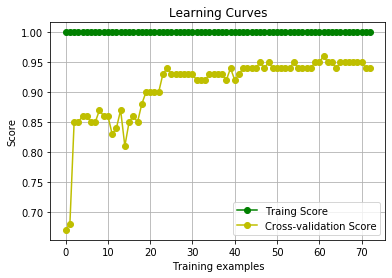

In [4]:
draw_learning_curves(X, y, gb_estimator, y.shape[0])

/Users/webstrum/anaconda3/envs/dsna/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 73 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


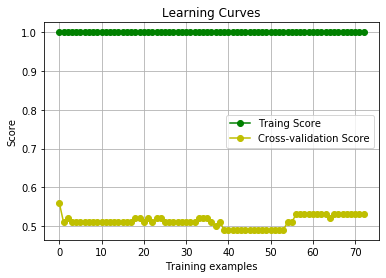

In [5]:
draw_learning_curves(X, y, svc_estimator, y.shape[0])

#### 07. Solution: Detecting Overfitting and Underfitting

We can observe from the curves that:

* The Logistic Regression model has a `low training and testing score`.
* The Decision Tree model has a `high training and testing score`.
* The Support Vector Machine model has a `high training score, and a low testing score`.

From here, we can determine that the Logistic Regression model `underfits`, the SVM model `overfits`, and the Decision Tree model is `just right`.

What our models do, is the following:

* The Logistic Regression model uses a line, which is too simplistic. It doesn't do very well on the training set. Thus, it underfits.
* The Decision Tree model uses a square, which is a pretty good fit, and generalizes well. Thus, this model is good.
* The Support Vector Machine model actually draws a tiny circle around each point. This is clearly just memorizing the training set, and won't generalize well. Thus, it overfits.

#### 08. Grid Search

here's a summary of what we do in machine learning.

1. First we train a bunch of models with our training data(hyperparameters)
2. then we use a cross-validation data to pick the best of these models(F1-score)
3. and finally, we test it with the testing data to make sure our model is good.

#### 09. Grid Search in sklearn

Grid Search in sklearn is very simple. We'll illustrate it with an example. Let's say we'd like to train a support vector machine, and we'd like to decide between the following parameters:

* kernel: poly or rbf.
* C: 0.1, 1, or 10.

The steps are the following:

In [6]:
### 1. Import GridSearchCV

from sklearn.model_selection import GridSearchCV

In [7]:
### 2. Select the parameters
# Here we pick what are the parameters we want to choose from, and form a dictionary. 
# In this dictionary, the keys will be the names of the parameters, 
# and the values will be the lists of possible values for each parameter.

parameters = {'kernel': ['poly', 'rbf'],
              'C': [0.1, 1, 10]}

In [8]:
### 3. Create a scorer
# We need to decide what metric we'll use to score each of the candidate models. 
# In here, we'll use F1 Score.

from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

scorer = make_scorer(f1_score)

In [9]:
### 4. Create a GridSearch Object with the parameters, and the scorer. 
# Use this object to fit the data.

from sklearn.svm import SVC
clf = SVC()
# Create the object.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
# Fit the data
grid_fit = grid_obj.fit(X, y)

In [10]:
### 5. Get the best estimator.
best_clf = grid_fit.best_estimator_
best_clf

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 10. Grid Search Lab

**Improving a model with Grid Search**

In this mini-lab, we'll fit a decision tree model to some sample data. This initial model will overfit heavily. Then we'll use Grid Search to find better parameters for this model, to reduce the overfitting.

In [11]:
# First, some imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

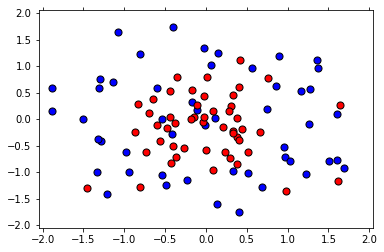

In [12]:
### 1. Reading and plotting the data
# Now, a function that will help us read the csv file, 
# and plot the data.
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:, 0:2]
    y = data[:, 2]
    
    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(), 1], s=50, color='blue', edgecolor='k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(), 1], s=50, color='red', edgecolor='k')
    
    plt.xlim(-2.05, 2.05)
    plt.ylim(-2.05, 2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')
    
    return X,y

X, y = load_pts('../../data/gs_data.csv')
plt.show()

In [13]:
### 2. Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

# Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
### 3. Fitting a Decision Tree model

from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make preditions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

Now let's plot the model, and find the testing f1_score, to see how we did. The following function will help us plot the model.

In [15]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

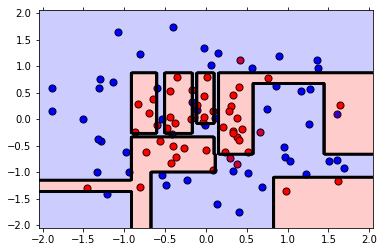

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


In [16]:
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

Woah! Some heavy overfitting there. Not just from looking at the graph, but also from looking at the difference between the high training score (1.0) and the low testing score (0.7). Let's see if we can find better hyperparameters for this model to do better. We'll use grid search for this.

In here, we'll do the following steps:
1. First define some parameters to perform grid search on. We suggest to play with `max_depth`, `min_samples_leaf`, and `min_samples_split`.
2. Make a scorer for the model using `f1_score`.
3. Perform grid search on the classifier, using the parameters and the scorer.
4. Fit the data to the new classifier.
5. Plot the model and find the f1_score.
6. If the model is not much better, try changing the ranges for the parameters and fit it again.

The training F1 score is  0.8148148148148148
The testing F1 score is  0.8


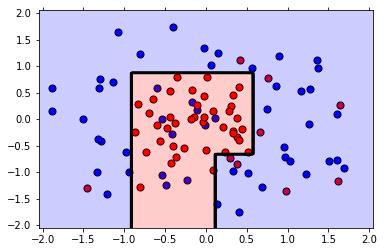

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [17]:
### 4. (TODO) Use grid search to improve this model.

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# Create the parameters list you wish to tune.
# parameters = {'max_depth':[2,10,50],'min_samples_leaf':[1,5,10,20],'min_samples_split':[5,10,20]}
# solution parameters
parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10]}

# Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X, y)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make preditions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model
print('The training F1 score is ', f1_score(best_train_predictions, y_train))
print('The testing F1 score is ', f1_score(best_test_predictions, y_test))

# Plot the new model.
plot_model(X, y, best_clf)

# Let's also explore what parameters ended up being used in the new model.
best_clf

#### 11. [Solution] Grid Search Lab

#### 12. Putting It All Together

**Diabetes Case Study**

You now have had the opportunity to work with a range of supervised machine learning techniques for both classification and regression.  Before you apply these in the project, let's do one more example to see how the machine learning process works from beginning to end with another popular dataset.

We will start out by reading in the dataset and our necessary libraries.  You will then gain an understanding of how to optimize a number of models using grid searching as you work through the notebook. 

In [18]:
# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

import check_file as ch

# Read in our dataset
diabetes = pd.read_csv('../../data/diabetes.csv')

# Take a look at the first few rows of the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Because this course has been aimed at understanding machine learning techniques, we have largely ignored items related to parts of the data analysis process that come before building machine learning models - exploratory data analysis, feature engineering, data cleaning, and data wrangling.  

> **Step 1:** Let's do a few steps here.  Take a look at some of usual summary statistics calculated to accurately match the values to the appropriate key in the dictionary below. 

In [19]:
# proportion of diabetes
num_obs = len(diabetes)
num_true = len(diabetes.loc[diabetes["Outcome"]==1])
num_false = len(diabetes.loc[diabetes["Outcome"]==0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [20]:
# proportion of missing data
# diabetes[diabetes.isna().any(axis=1)]
count_nan = len(diabetes) - diabetes.count()
print(count_nan)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


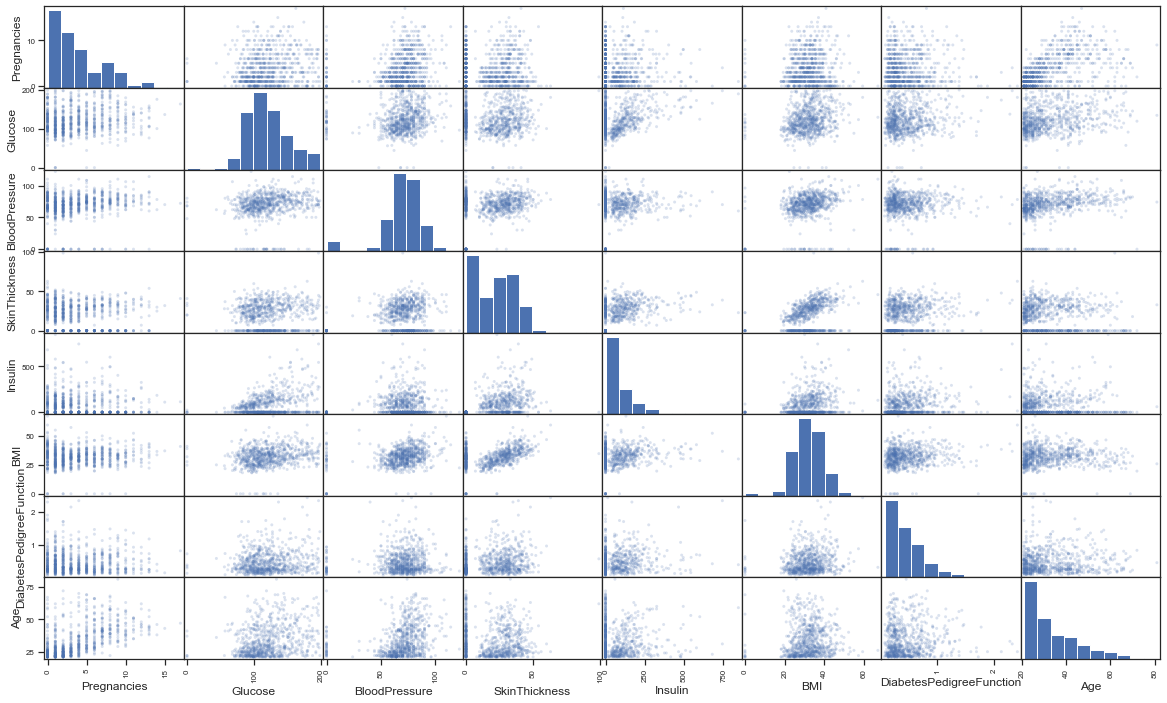

In [21]:
pd.plotting.scatter_matrix(diabetes.drop("Outcome", axis=1), alpha=0.2, figsize=(20, 12));

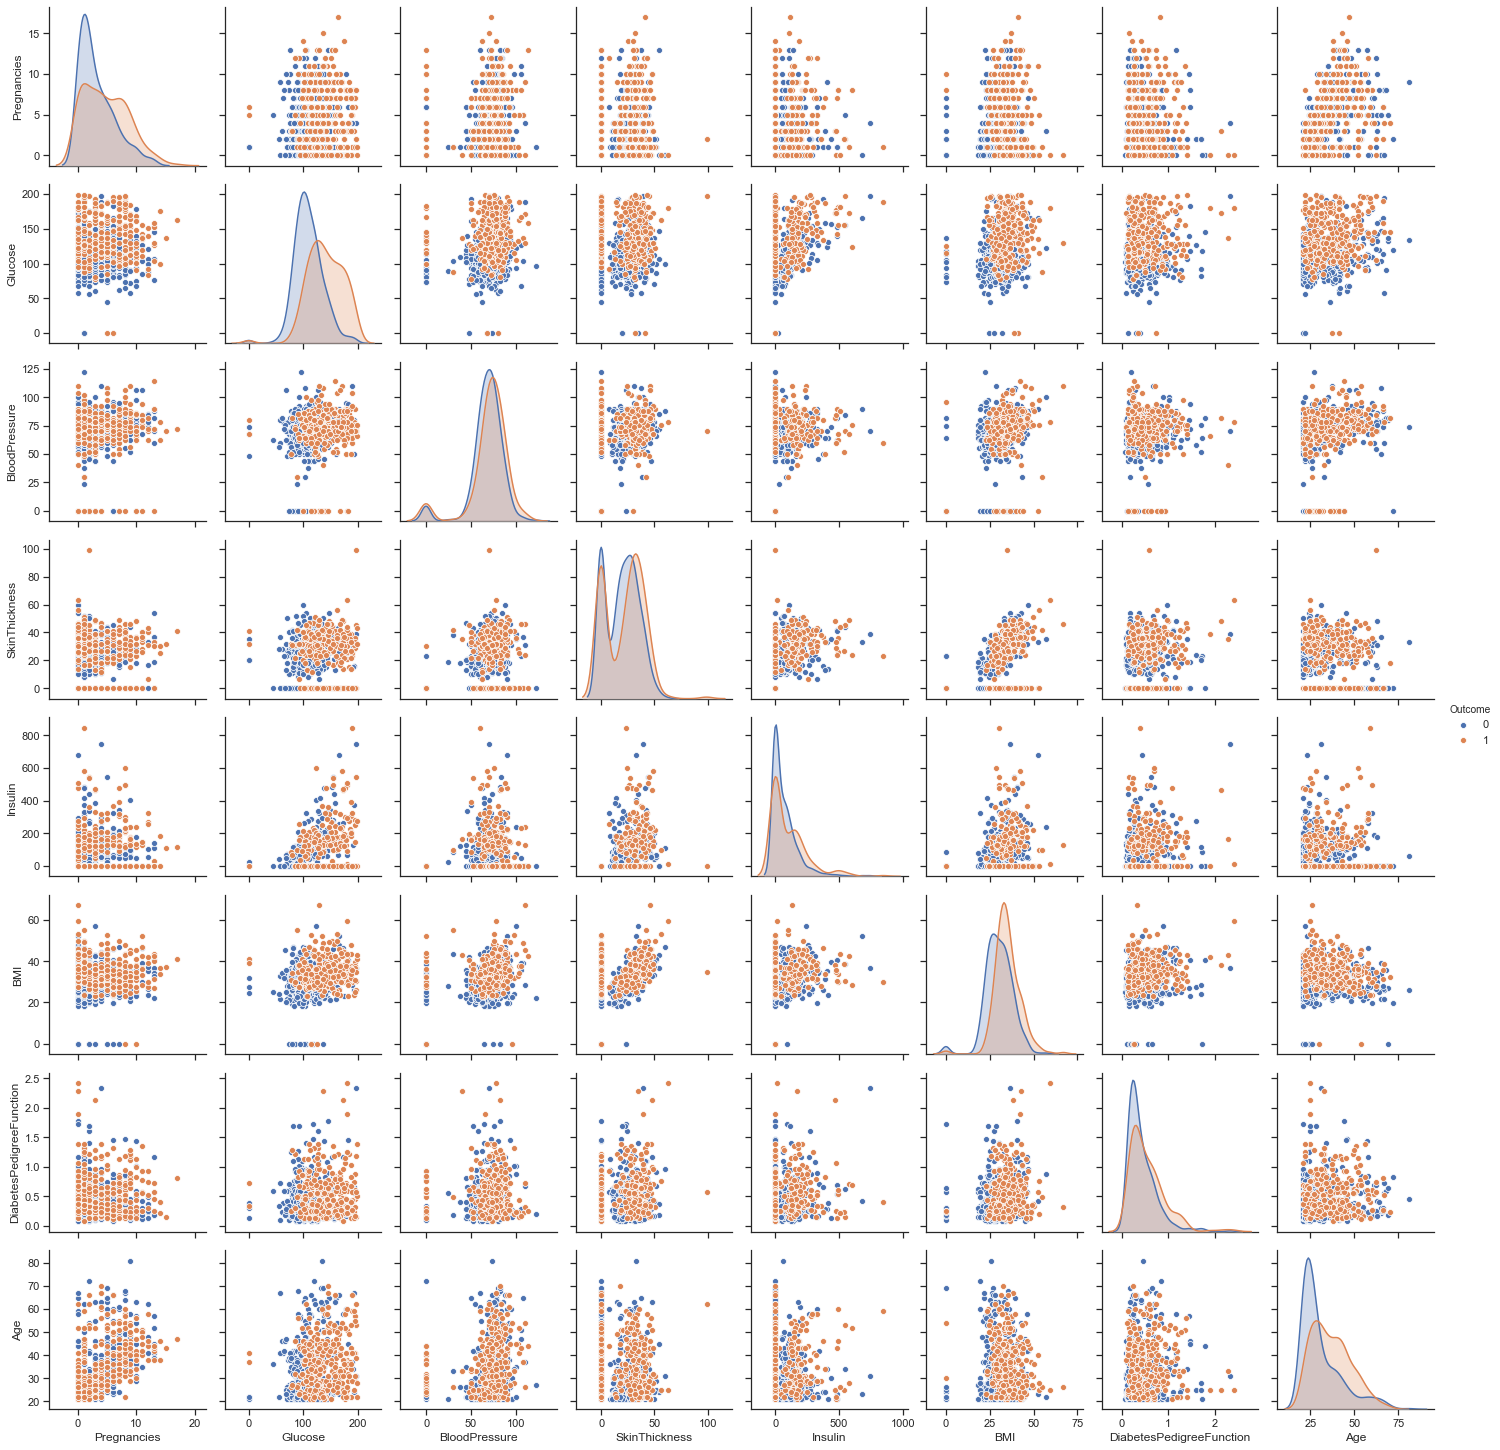

In [22]:
sns.pairplot(diabetes, hue="Outcome");

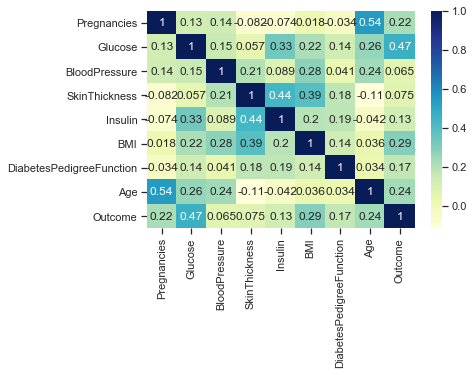

In [23]:
sns.heatmap(diabetes.corr(), annot=True, cmap="YlGnBu");

In [24]:
# Check correlations between collumns
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [25]:
# Gets stats about data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


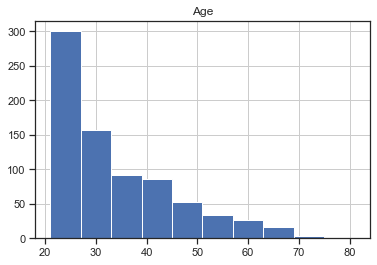

In [26]:
# Plot distribution
diabetes.hist(column='Age');

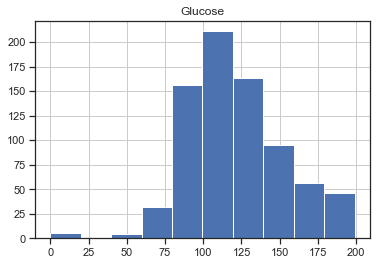

In [27]:
# plot distribution
diabetes.hist(column='Glucose');

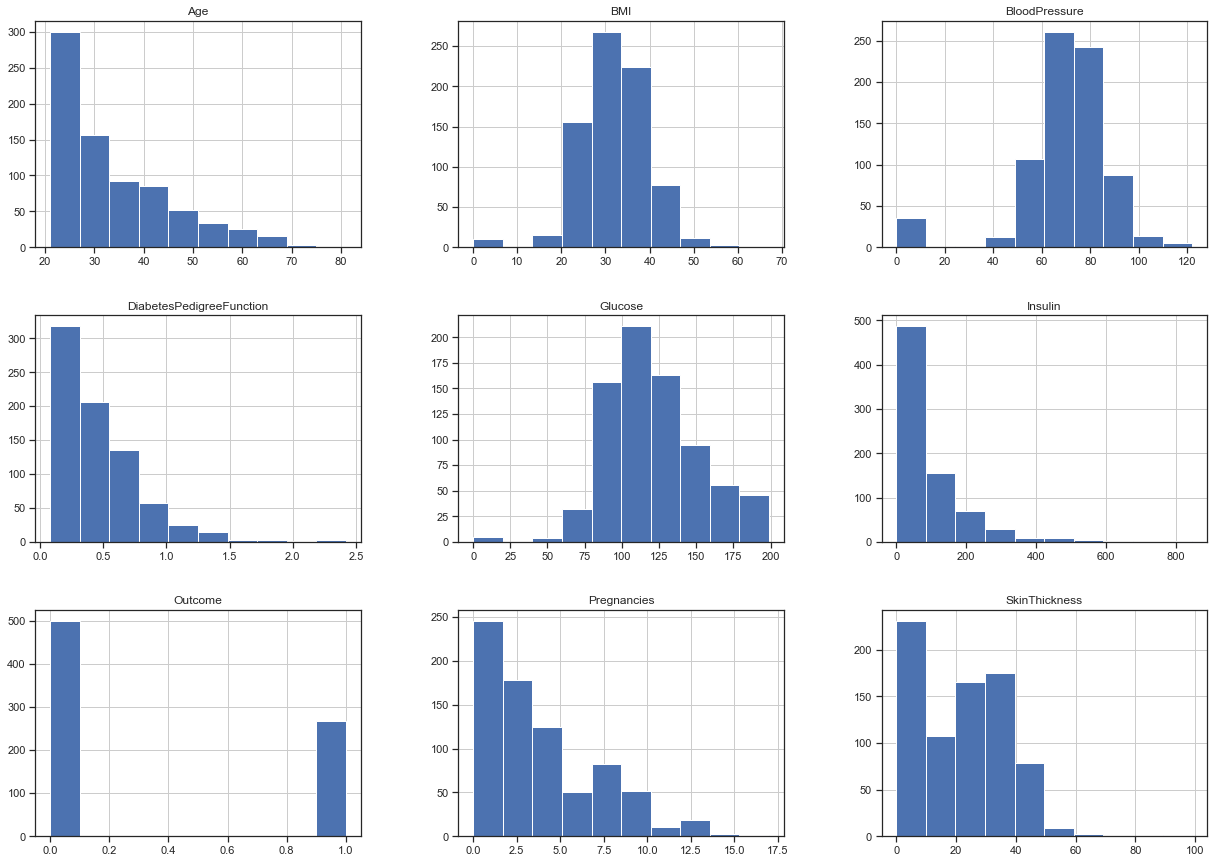

In [28]:
diabetes.hist(figsize=(21, 15));

In [29]:
# Possible keys for the dictionary
a = '0.65'
b = '0'
c = 'Age'
d = '0.35'
e = 'Glucose'
f = '0.5'
g = "More than zero"

# Fill in the dictionary with the correct values here
answers_one = {
    'The proportion of diabetes outcomes in the dataset': d,# add letter here,
    'The number of missing data points in the dataset': b,# add letter here,
    'A dataset with a symmetric distribution': e,# add letter here,
    'A dataset with a right-skewed distribution': c,# add letter here, 
    'This variable has the strongest correlation with the outcome': e# add letter here
}

# Just to check your answer, don't change this
ch.check_one(answers_one)

Awesome! These all look great!


> **Step 2**: Since our dataset here is quite clean, we will jump straight into the machine learning.  Our goal here is to be able to predict cases of diabetes.  First, you need to identify the y vector and X matrix.  Then, the following code will divide your dataset into training and test data.   

In [30]:
# Pull y column
y = diabetes['Outcome'].values
# Pull X variable columns
feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 
                     'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age']
X = diabetes[feature_col_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that you have a training and testing dataset, we need to create some models that and ultimately find the best of them.  However, unlike in earlier lessons, where we used the defaults, we can now tune these models to be the very best models they can be.

It can often be difficult (and extremely time consuming) to test all the possible hyperparameter combinations to find the best models.  Therefore, it is often useful to set up a randomized search.  

In practice, randomized searches across hyperparameters have shown to be more time confusing, while still optimizing quite well.  One article related to this topic is available [here](https://blog.h2o.ai/2016/06/hyperparameter-optimization-in-h2o-grid-search-random-search-and-the-future/).  The documentation for using randomized search in sklearn can be found [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In order to use the randomized search effectively, you will want to have a pretty reasonable understanding of the distributions that best give a sense of your hyperparameters.  Understanding what values are possible for your hyperparameters will allow you to write a grid search that performs well (and doesn't break).

> **Step 3**: In this step, I will show you how to use randomized search, and then you can set up grid searches for the other models in Step 4.  However, you will be helping, as I don't remember exactly what each of the hyperparameters in SVMs do.  Match each hyperparameter to its corresponding tuning functionality.

In [31]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

ch.print_metrics(y_test, rf_preds, 'random forest')

Accuracy score for random forest : 0.7662337662337663
Precision score random forest : 0.6727272727272727
Recall score random forest : 0.6727272727272727
F1 score random forest : 0.6727272727272727





> **Step 4**: Now that you have seen how to run a randomized grid search using random forest, try this out for the AdaBoost and SVC classifiers.  You might also decide to try out other classifiers that you saw earlier in the lesson to see what works best.

In [32]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist_ada = {"n_estimators": [10, 100, 200, 400],
                  "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}

# Run a randomized search over the hyperparameters
random_search_ada = RandomizedSearchCV(clf_ada, param_distributions=param_dist_ada)

# Fit the model on the training data
random_search_ada.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = random_search_ada.best_estimator_.predict(X_test)

# Return your metrics on test data
ch.print_metrics(y_test, ada_preds, 'adaboost')

Accuracy score for adaboost : 0.7727272727272727
Precision score adaboost : 0.717391304347826
Recall score adaboost : 0.6
F1 score adaboost : 0.6534653465346534





In [33]:
# build a classifier for support vector machines
clf_svc = SVC()

# Set up the hyperparameter search
# look at setting up your search for C (recommend 0-10 range), 
# kernel, and degree
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_dist_svc = {"C": [0.1, 0.3, 0.5, 1, 3, 5],
                  "kernel": ['linear','rbf']
                  }


# Run a randomized search over the hyperparameters
random_search_svc = RandomizedSearchCV(clf_svc, param_distributions=param_dist_svc)

# Fit the model on the training data
random_search_svc.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = random_search_svc.best_estimator_.predict(X_test)


# Return your metrics on test data
ch.print_metrics(y_test, svc_preds, 'svc')

Accuracy score for svc : 0.7532467532467533
Precision score svc : 0.6545454545454545
Recall score svc : 0.6545454545454545
F1 score svc : 0.6545454545454545





> **Step 5**: Use the test below to see if your best model matched, what we found after running the grid search.

In [34]:
a = 'randomforest'
b = 'adaboost'
c = 'supportvector'

best_model = b # put your best model here as a string or variable

# See if your best model was also mine.  
# Notice these might not match depending your search!
ch.check_best(best_model)

Nice!  It looks like your best model matches the best model I found as well!  It makes sense to use f1 score to determine best in this case given the imbalance of classes.  There might be justification for precision or recall being the best metric to use as well - precision showed to be best with adaboost again.  With recall, SVMs proved to be the best for our models.


Once you have found your best model, it is also important to understand why it is performing well.  In regression models where you can see the weights, it can be much easier to interpret results. 

> **Step 6**:  Despite the fact that your models here are more difficult to interpret, there are some ways to get an idea of which features are important.  Using the "best model" from the previous question, find the features that were most important in helping determine if an individual would have diabetes or not. Do your conclusions match what you might have expected during the exploratory phase of this notebook?

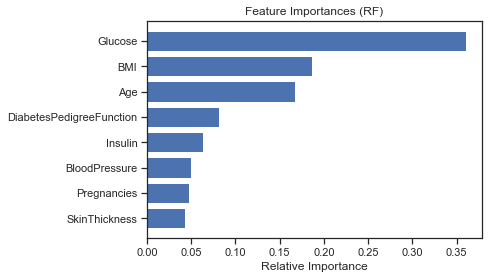

In [35]:
# Show your work here - the plot below was helpful for me
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
features = diabetes.columns[:diabetes.shape[1]]
importances = random_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances (RF)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

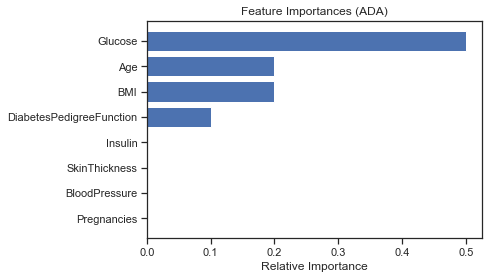

In [36]:
features = diabetes.columns[:diabetes.shape[1]]
importances = random_search_ada.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances (ADA)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

> **Step 7**:  Using your results above to complete the dictionary below.

In [37]:
# Check your solution by matching the correct values in the dictionary
# and running this cell
a = 'Age'
b = 'BloodPressure'
c = 'BMI'
d = 'DiabetesPedigreeFunction'
e = 'Insulin'
f = 'Glucose'
g = 'Pregnancy'
h = 'SkinThickness'

sol_seven = {
    'The variable that is most related to the outcome of diabetes' : f,# letter here,
    'The second most related variable to the outcome of diabetes' : c,# letter here,
    'The third most related variable to the outcome of diabetes' : a,# letter here,
    'The fourth most related variable to the outcome of diabetes' : d# letter here
}

ch.check_q_seven(sol_seven)

That's right!  Some of these were expected, but some were a bit unexpected too!


> **Step 8**:  Now provide a summary of what you did through this notebook, and how you might explain the results to a non-technical individual.  When you are done, check out the solution notebook by clicking the orange icon in the upper left.

* The proportion of diabetes outcomes in the dataset is 0.35
* The number of missing data points in the dataset is 0
* A dataset with a symmetric distribution is Glucose
* A dataset with a right-skewed distribution Age
* The Glucose variable has the strongest correlation with the outcome

#### 13. Outro